In [1]:
import os
import cv2
import random
from tqdm import tqdm
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

/Users/rww21/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


### Load models

In [2]:
sign_model = tf.keras.models.load_model('models/sign_model.h5')
num_model = tf.keras.models.load_model('models/number_model.h5')

### Load test datasets

In [3]:
# Load alphabet sign language dataset
alpha_x = pd.read_csv(r'alpha_data/sign_mnist_train/sign_mnist_train.csv')
test = pd.read_csv(r'alpha_data/sign_mnist_train/sign_mnist_train.csv')
alpha_y = test['label']

In [4]:
# Load numerical sign language dataset
datadir = 'number_data'
categories = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
img_size = [28,28]

num_x = []
num_y = []
training_data = []

def create_training_data():
    for category in categories:

        path = os.path.join(datadir,category)
        class_num = categories.index(category)

        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (img_size[1], img_size[0]))
                training_data.append([new_array, class_num])
            except Exception as e: 
                pass
create_training_data() 

for features,label in training_data:
    num_x.append(features)
    num_y.append(label)

num_x = np.array(num_x).reshape(-1, img_size[1], img_size[0], 1)

100%|██████████| 1500/1500 [00:03<00:00, 414.58it/s]


### Preprocessing

In [5]:
# For alphabet sign laguage

del alpha_x['label']
alpha_x = alpha_x.values
# Normalize the data
alpha_x = alpha_x / 255
# Reshaping data from 1D to 3D
alpha_x = alpha_x.reshape(-1,28,28,1)

In [6]:
# For numerical sign language
train_num_x, num_x, train_num_y, num_y = train_test_split(num_x, num_y, test_size=0.2, random_state=42)

# Normalize the data
num_x = num_x / 255
# Reshaping data from 1D to 3D
num_x = num_x.reshape(-1,28,28,1)

### Model predictions for sign alphabet

In [7]:
predictions = sign_model.predict(alpha_x)
alpha_pred = predictions.argmax(axis=1)
for i in range(len(alpha_pred)):
    if(alpha_pred[i] >= 9):
        alpha_pred[i] += 1
alpha_pred[:5]

858/858 [==============================] - 6s 7ms/step


array([ 3,  7,  2,  2, 13])

In [8]:
num_labels = [num for num in range(25) if num != 9]
labels = ['A', 'B', 'C','D','E','F','G','H','I', 'J', 'K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']

# Convert test data to alphabet labels
label_test= []
for num in alpha_y.tolist():
    if num in num_labels:
        label_test.append(labels[num])
    else:
        label_test.append("Invalid")

# Convert predictions to alphabet labels
label_pred = []
for num in alpha_pred.tolist():
    if num in num_labels:
        label_pred.append(labels[num])
    else:
        label_pred.append("Invalid")

### Examples of sign alphabet predictions

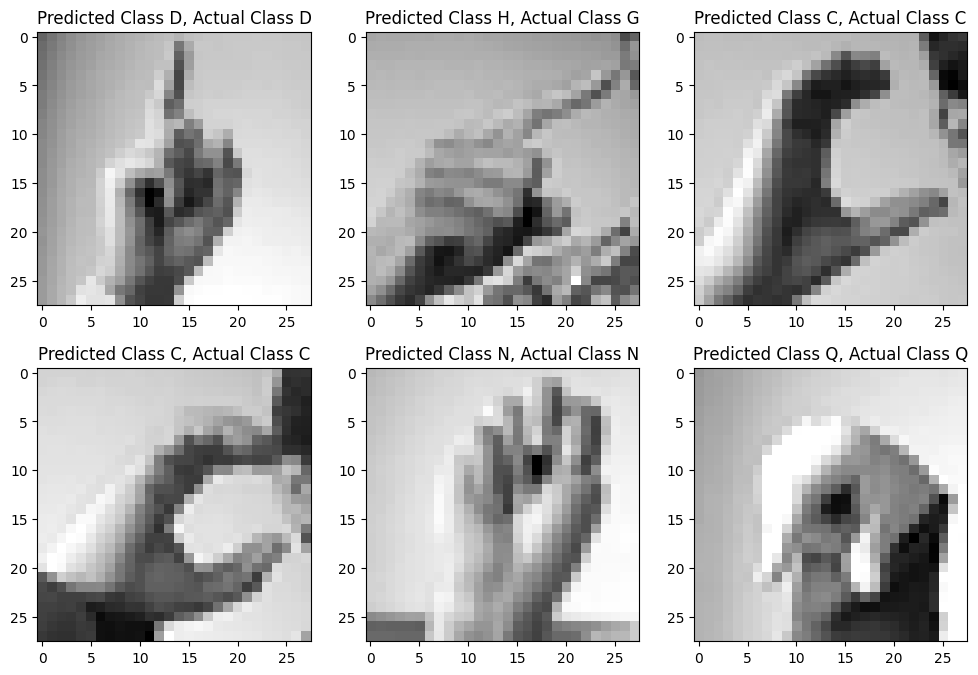

In [9]:
i = 0
plt.figure(figsize=(12, 8))
correct = np.nonzero(alpha_pred == alpha_y)[0]


for n in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(alpha_x[n].reshape(28, 28), cmap="gray", interpolation='none')
    plt.title("Predicted Class {}, Actual Class {}".format(label_pred[n], label_test[n]))
    i += 1

plt.show()

### Model predictions for numerical alphabet

In [10]:
predictions = num_model.predict(num_x) 
num_pred = np.argmax(predictions,axis=1)

94/94 [==============================] - 1s 7ms/step


### Examples of sign number predictions

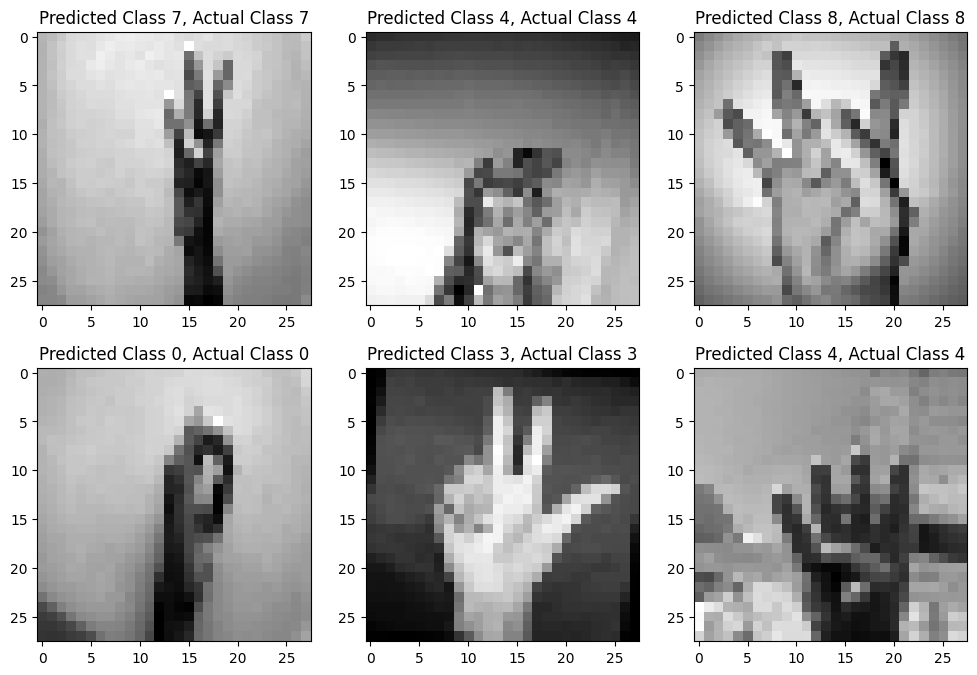

In [11]:
i = 0
plt.figure(figsize=(12, 8))
correct = np.nonzero(num_pred == num_y)[0]

for c in correct[:6]:
    plt.subplot(2, 3, i+1)
    plt.imshow(num_x[c].reshape(28, 28), cmap="gray", interpolation='none')
    plt.title("Predicted Class {}, Actual Class {}".format(num_pred[c], num_y[c]))
    i += 1

plt.show()